In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)


In [ ]:
df_train = pd.read_csv("../data/processed/numeric_train_data.csv")
df_val = pd.read_csv("../data/processed/numeric_val_data.csv")
df_test = pd.read_csv("../data/processed/numeric_test_data.csv")

In [3]:
df_train_final = pd.concat([df_train,df_val], axis=0)
df_train_final

,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,label
0,0.504315,0.548461,0.501602,0.542981,0.519444,0.689757,0.674948,0.571628,0.550304,0.521429,...,0.580840,0.591705,0.399666,0.599349,0.472456,0.647290,0.416770,0.721205,0.244970,0
1,0.433211,0.484077,0.449849,0.491398,0.503308,0.682860,0.695454,0.762369,0.770101,0.703590,...,0.477089,0.576566,0.364740,0.567235,0.376243,0.694686,0.574954,0.745847,0.375365,0
2,0.650005,0.730896,0.709415,0.698076,0.638344,0.693965,0.629554,0.687421,0.722584,0.719230,...,0.557636,0.580289,0.398246,0.782590,0.566742,0.696631,0.526107,0.836288,0.485992,0
3,0.515072,0.483673,0.467737,0.631756,0.627723,0.595867,0.515102,0.535442,0.546995,0.577641,...,0.404663,0.627310,0.343542,0.660205,0.411806,0.616249,0.412144,0.656624,0.200678,0
4,0.302506,0.493074,0.504830,0.383060,0.388507,0.704446,0.840085,0.752893,0.431209,0.273619,...,0.507439,0.545278,0.397998,0.664384,0.438337,0.768158,0.265497,0.659639,0.276219,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7637,0.437047,0.555612,0.487570,0.609676,0.565383,0.621709,0.705636,0.768562,0.671040,0.537779,...,0.625622,0.357911,0.573465,0.500598,0.638202,0.485155,0.570285,0.447402,0.553567,1
7638,0.286778,0.296154,0.394823,0.698401,0.685904,0.722048,0.569149,0.679403,0.785093,0.608060,...,0.631064,0.517908,0.599596,0.580383,0.628368,0.310323,0.410315,0.638640,0.454653,1
7639,0.386399,0.561362,0.596431,0.696707,0.591178,0.571610,0.670914,0.818815,0.770197,0.577832,...,0.660530,0.477367,0.563112,0.509746,0.566321,0.331353,0.613877,0.637037,0.532293,1
7640,0.441040,0.602926,0.523737,0.542881,0.670638,0.679416,0.491501,0.493725,0.556791,0.813018,...,0.529096,0.396013,0.642967,0.527645,0.665692,0.178644,0.453539,0.477542,0.553312,1


In [4]:
df_train_final.groupby(by="label").count()

,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,...,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20
label,,,,,,,,,,,,,,,,,,,,,
0,5128,5128,5128,5128,5128,5128,5128,5128,5128,5128,...,5128,5128,5128,5128,5128,5128,5128,5128,5128,5128
1,10254,10254,10254,10254,10254,10254,10254,10254,10254,10254,...,10254,10254,10254,10254,10254,10254,10254,10254,10254,10254


In [5]:
df_test.groupby(by="label").count()

,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,...,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20
label,,,,,,,,,,,,,,,,,,,,,
0,7355,7355,7355,7355,7355,7355,7355,7355,7355,7355,...,7355,7355,7355,7355,7355,7355,7355,7355,7355,7355
1,14716,14716,14716,14716,14716,14716,14716,14716,14716,14716,...,14716,14716,14716,14716,14716,14716,14716,14716,14716,14716


In [6]:
# === Data Splits ===
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

X_train_final = df_train_final.iloc[:, :-1]
y_train_final = df_train_final.iloc[:, -1]

X_val = df_val.iloc[:, :-1]
y_val = df_val.iloc[:, -1]

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

In [7]:
X_train.head()

,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,...,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20
0,0.504315,0.548461,0.501602,0.542981,0.519444,0.689757,0.674948,0.571628,0.550304,0.521429,...,0.669963,0.580840,0.591705,0.399666,0.599349,0.472456,0.647290,0.416770,0.721205,0.244970
1,0.433211,0.484077,0.449849,0.491398,0.503308,0.682860,0.695454,0.762369,0.770101,0.703590,...,0.777054,0.477089,0.576566,0.364740,0.567235,0.376243,0.694686,0.574954,0.745847,0.375365
2,0.650005,0.730896,0.709415,0.698076,0.638344,0.693965,0.629554,0.687421,0.722584,0.719230,...,0.708333,0.557636,0.580289,0.398246,0.782590,0.566742,0.696631,0.526107,0.836288,0.485992
3,0.515072,0.483673,0.467737,0.631756,0.627723,0.595867,0.515102,0.535442,0.546995,0.577641,...,0.488018,0.404663,0.627310,0.343542,0.660205,0.411806,0.616249,0.412144,0.656624,0.200678
4,0.302506,0.493074,0.504830,0.383060,0.388507,0.704446,0.840085,0.752893,0.431209,0.273619,...,0.487332,0.507439,0.545278,0.397998,0.664384,0.438337,0.768158,0.265497,0.659639,0.276219


### RANDOM FOREST

In [8]:
feature_rf = [
    'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_8', 'chroma_9',
    'chroma_11', 'chroma_12', 'spectral_bandwidth_mean',
    'spectral_rolloff_mean', 'mfcc_1', 'mfcc_3', 'mfcc_4', 'mfcc_5',
    'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
    'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18',
    'mfcc_19', 'mfcc_20'
]

X_train_rf = X_train[feature_rf]
X_val_rf = X_val[feature_rf]
X_test_rf = X_test[feature_rf]

✅ Train Accuracy (RF): 99.95%


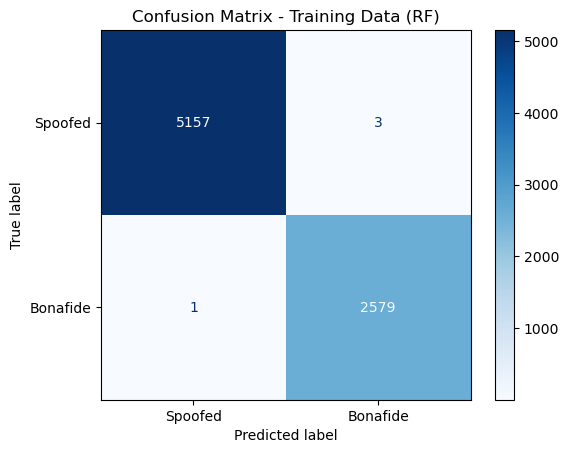

✅ Validation Accuracy (RF): 94.98%


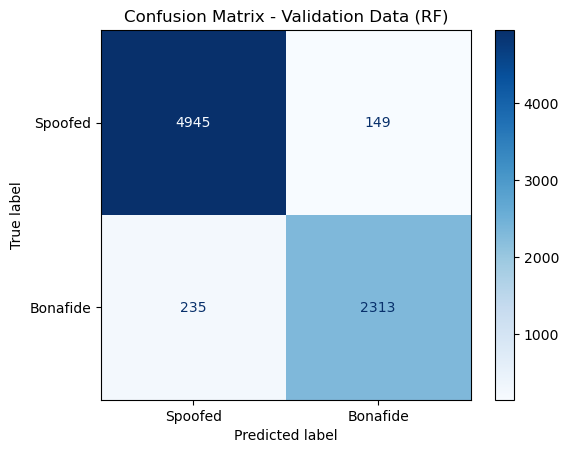

In [9]:
# === Random Forest Hyperparameters ===
params = {
    'n_estimators': 111,
    'max_depth': 15,
    'min_samples_split': 4,
    'min_samples_leaf': 2,
    'max_features': 'log2',
    'class_weight': None,
    'random_state' : 42
}

# === Model Training ===
rf_model = RandomForestClassifier(**params)
rf_model.fit(X_train_rf, y_train)

# === Evaluation on Training Data ===
y_pred_train_rf = rf_model.predict(X_train_rf)
train_acc_rf = accuracy_score(y_train, y_pred_train_rf)
print(f"✅ Train Accuracy (RF): {train_acc_rf * 100:.2f}%")

cf_train_rf = confusion_matrix(y_train, y_pred_train_rf, labels=[1, 0])
ConfusionMatrixDisplay(cf_train_rf, display_labels=["Spoofed", "Bonafide"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Training Data (RF)")
plt.show()

# === Evaluation on Validation Data ===
y_pred_val_rf = rf_model.predict(X_val_rf)
val_acc_rf = accuracy_score(y_val, y_pred_val_rf)
print(f"✅ Validation Accuracy (RF): {val_acc_rf * 100:.2f}%")

cf_val_rf = confusion_matrix(y_val, y_pred_val_rf, labels=[1, 0])
ConfusionMatrixDisplay(cf_val_rf, display_labels=["Spoofed", "Bonafide"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Validation Data (RF)")
plt.show()

✅ Test Accuracy (RF): 80.85%


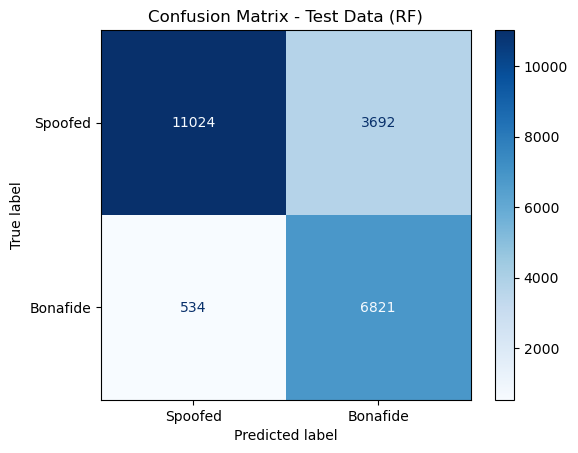

In [10]:
y_pred_test_rf = rf_model.predict(X_test_rf)
test_acc_rf = accuracy_score(y_test, y_pred_test_rf)
print(f"✅ Test Accuracy (RF): {test_acc_rf * 100:.2f}%")

cf_test_rf = confusion_matrix(y_test, y_pred_test_rf, labels=[1, 0])
ConfusionMatrixDisplay(cf_test_rf, display_labels=["Spoofed", "Bonafide"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Test Data (RF)")
plt.show()

In [11]:
# ===== METRIK EVALUASI TEST DATA =====
print("=== Classification Report - Test Data (RF) ===")
print(classification_report(y_test, y_pred_test_rf, target_names=["Bonafide", "Spoofed"], digits=4))


=== Classification Report - Test Data (RF) ===
              precision    recall  f1-score   support

    Bonafide     0.6488    0.9274    0.7635      7355
     Spoofed     0.9538    0.7491    0.8392     14716

    accuracy                         0.8085     22071
   macro avg     0.8013    0.8383    0.8013     22071
weighted avg     0.8522    0.8085    0.8139     22071



In [ ]:
test_label = pd.read_csv("../data/processed/test_label.csv")
test_label["attack_id"]

0          -
1          -
2          -
3          -
4          -
        ... 
22066    A19
22067    A19
22068    A19
22069    A19
22070    A19
Name: attack_id, Length: 22071, dtype: object

In [14]:
X_test_result_rf = X_test_rf.copy()
X_test_result_rf["y_actual"] = y_test.values
X_test_result_rf["y_pred"] = y_pred_test_rf
X_test_result_rf["attack_id"] = test_label["attack_id"]
X_test_result_rf

,chroma_1,chroma_2,chroma_3,chroma_4,chroma_8,chroma_9,chroma_11,chroma_12,spectral_bandwidth_mean,spectral_rolloff_mean,...,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,y_actual,y_pred,attack_id
0,0.294816,0.503692,0.480659,0.486471,0.801118,0.494999,0.417937,0.322776,0.519771,0.408384,...,0.308717,0.618259,0.538676,0.477636,0.470927,0.631759,0.248168,0,0,-
1,0.617019,0.545311,0.379189,0.405296,0.392575,0.473532,0.544850,0.641157,0.624234,0.573073,...,0.227763,0.564726,0.483087,0.510242,0.302176,0.796255,0.188663,0,0,-
2,0.444568,0.674772,0.507009,0.446029,0.585583,0.385803,0.560091,0.448158,0.506440,0.311685,...,0.474945,0.656124,0.536349,0.575920,0.416949,0.713852,0.269293,0,0,-
3,0.353409,0.372058,0.435908,0.637940,0.450481,0.409119,0.405053,0.449638,0.552365,0.348409,...,0.360674,0.577678,0.319412,0.604456,0.290465,0.629287,0.321853,0,1,-
4,0.445617,0.598166,0.593869,0.598029,0.793946,0.785415,0.681565,0.515130,0.726255,0.626707,...,0.392434,0.699011,0.386863,0.545826,0.465624,0.840376,0.363315,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22066,0.575486,0.709273,0.695486,0.766051,0.714555,0.684441,0.733229,0.653344,0.636481,0.589108,...,0.723416,0.506961,0.707798,0.349331,0.621979,0.452747,0.586745,1,1,A19
22067,0.459799,0.512797,0.548949,0.736511,0.770717,0.643879,0.852606,0.566639,0.558435,0.443058,...,0.644758,0.595426,0.634791,0.321747,0.534121,0.648680,0.561448,1,1,A19
22068,0.469171,0.616217,0.688349,0.746042,0.872185,0.823696,0.602333,0.546370,0.641442,0.491962,...,0.745214,0.623125,0.626379,0.328685,0.465577,0.516776,0.502891,1,1,A19
22069,0.655198,0.756755,0.656292,0.753486,0.775556,0.656615,0.624203,0.561162,0.717723,0.685905,...,0.669679,0.633360,0.812845,0.356809,0.703286,0.524107,0.500577,1,1,A19


In [15]:
# Tambahkan kolom 'is_correct' untuk menandai apakah prediksi benar
X_test_result_rf["is_correct"] = X_test_result_rf["y_actual"] == X_test_result_rf["y_pred"]

# Hitung jumlah benar dan salah per attack_id
grouped = X_test_result_rf.groupby(["attack_id", "is_correct"]).size().unstack(fill_value=0)

# Rename kolom agar jelas
grouped = grouped.rename(columns={True: "benar", False: "salah"})

# Tambahkan kolom total
grouped["total"] = grouped["benar"] + grouped["salah"]

# Urutkan berdasarkan jumlah salah (optional)
grouped = grouped.sort_values(by="salah", ascending=False)

# Tampilkan
print("📊 Rekap klasifikasi per attack_id:")
print(grouped)


📊 Rekap klasifikasi per attack_id:
is_correct  salah  benar  total
attack_id                      
A18          1086     46   1132
A17           944    188   1132
A12           569    563   1132
-             534   6821   7355
A15           310    822   1132
A10           212    920   1132
A13           203    929   1132
A14           193    939   1132
A11           156    976   1132
A09            19   1113   1132
A07             0   1132   1132
A08             0   1132   1132
A16             0   1132   1132
A19             0   1132   1132


In [16]:
X_test_result_rf["attack_id"].value_counts()

attack_id
-      7355
A11    1132
A14    1132
A16    1132
A09    1132
A13    1132
A12    1132
A18    1132
A15    1132
A08    1132
A17    1132
A10    1132
A07    1132
A19    1132
Name: count, dtype: int64

In [17]:
y_test

0        0
1        0
2        0
3        0
4        0
        ..
22066    1
22067    1
22068    1
22069    1
22070    1
Name: label, Length: 22071, dtype: int64

In [ ]:
import joblib

# Simpan model ke file
joblib.dump(rf_model, "../model/best_model_rf.pkl")
print("Model berhasil disimpan")


Model berhasil disimpan ke 'svm_best_model.pkl'


### SVM

In [52]:
feature_svm = ['chroma_1', 'chroma_4', 'chroma_7', 'chroma_8', 'chroma_11', 'rms_mean',
       'spectral_centroid_mean', 'spectral_bandwidth_mean',
       'spectral_rolloff_mean', 'zcr_mean', 'mfcc_1', 'mfcc_2', 'mfcc_3',
       'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_9', 'mfcc_10', 'mfcc_14',
       'mfcc_17', 'mfcc_18', 'mfcc_19', 'mfcc_20']

X_train_svm = X_train[feature_svm]
X_val_svm = X_val[feature_svm]
X_test_svm = X_test[feature_svm]

✅ Train Accuracy (SVM): 99.57%


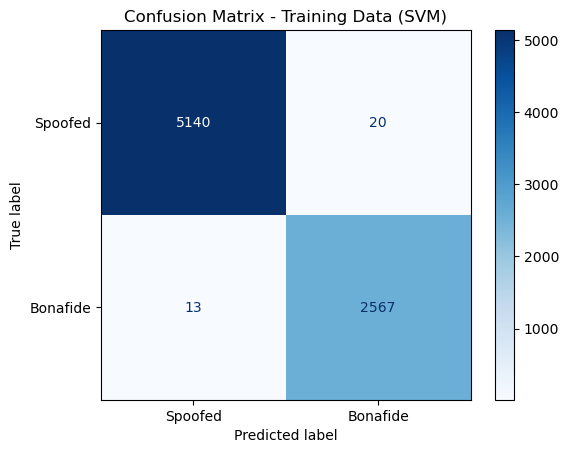

✅ Validation Accuracy (SVM): 97.63%


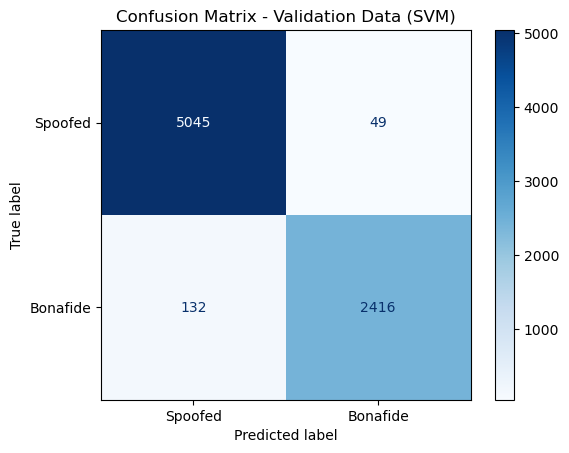

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Inisialisasi model SVM dengan hyperparameter terbaik
params = {
    'C': 19.519063724517864,
    'gamma': 0.4791572427747828,
    'class_weight': None,
    'random_state' :42
}

svm_model = SVC(**params)

# Latih model pada data training
svm_model.fit(X_train_svm, y_train)

# ===== Evaluasi pada Data Training =====
y_pred_train_svm = svm_model.predict(X_train_svm)
train_acc_svm = accuracy_score(y_train, y_pred_train_svm)
print(f"✅ Train Accuracy (SVM): {train_acc_svm * 100:.2f}%")

cf_train_svm = confusion_matrix(y_train, y_pred_train_svm, labels=[1, 0])
ConfusionMatrixDisplay(cf_train_svm, display_labels=["Spoofed", "Bonafide"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Training Data (SVM)")
plt.show()

# ===== Evaluasi pada Data Validation =====
y_pred_val_svm = svm_model.predict(X_val_svm)
val_acc_svm = accuracy_score(y_val, y_pred_val_svm)
print(f"✅ Validation Accuracy (SVM): {val_acc_svm * 100:.2f}%")

cf_val_svm = confusion_matrix(y_val, y_pred_val_svm, labels=[1, 0])
ConfusionMatrixDisplay(cf_val_svm, display_labels=["Spoofed", "Bonafide"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Validation Data (SVM)")
plt.show()


✅ Test Accuracy (SVM): 67.66%


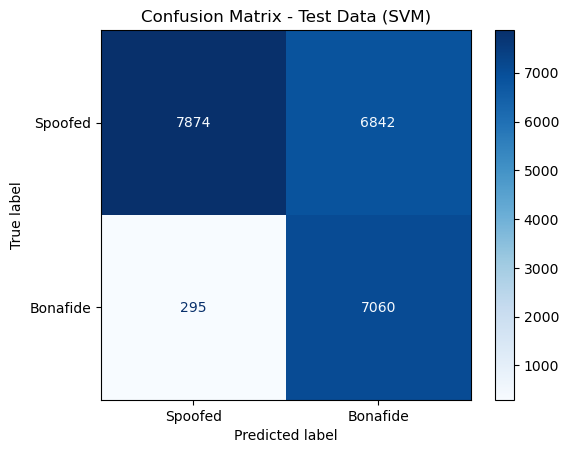

In [54]:
# ===== Evaluasi pada Data Test =====
y_pred_test_svm = svm_model.predict(X_test_svm)
test_acc_svm = accuracy_score(y_test, y_pred_test_svm)
print(f"✅ Test Accuracy (SVM): {test_acc_svm * 100:.2f}%")

cf_test_svm = confusion_matrix(y_test, y_pred_test_svm, labels=[1, 0])
ConfusionMatrixDisplay(cf_test_svm, display_labels=["Spoofed", "Bonafide"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Test Data (SVM)")
plt.show()

In [55]:
# ===== METRIK EVALUASI TEST DATA (SVM) =====
print("=== Classification Report - Test Data (SVM) ===")
print(classification_report(y_test, y_pred_test_svm, target_names=["Bonafide", "Spoofed"], digits=4))


=== Classification Report - Test Data (SVM) ===
              precision    recall  f1-score   support

    Bonafide     0.5078    0.9599    0.6643      7355
     Spoofed     0.9639    0.5351    0.6881     14716

    accuracy                         0.6766     22071
   macro avg     0.7359    0.7475    0.6762     22071
weighted avg     0.8119    0.6766    0.6802     22071



In [58]:
X_test_result_svm = X_test_svm.copy()
X_test_result_svm["y_actual"] = y_test
X_test_result_svm["y_pred"] = y_pred_test_svm
X_test_result_svm["attack_id"] = test_label["attack_id"]


In [ ]:
# Tambahkan kolom 'is_correct' untuk menandai apakah prediksi benar
X_test_result_svm["is_correct"] = X_test_result_svm["y_actual"] == X_test_result_svm["y_pred"]

# Hitung jumlah benar dan salah per attack_id
grouped_svm = X_test_result_svm.groupby(["attack_id", "is_correct"]).size().unstack(fill_value=0)

# Rename kolom agar lebih deskriptif
grouped_svm = grouped_svm.rename(columns={True: "benar", False: "salah"})

# Tambahkan kolom total
grouped_svm["total"] = grouped_svm["benar"] + grouped_svm["salah"]

# Urutkan berdasarkan jumlah salah
grouped_svm = grouped_svm.sort_values(by="salah", ascending=False)

# Tampilkan hasil rekap
print("📊 Rekap klasifikasi per attack_id (SVM):")
print(grouped_svm)


📊 Rekap klasifikasi per attack_id (SVM):
is_correct  salah  benar  total
attack_id                      
A18          1088     44   1132
A17          1002    130   1132
A12           913    219   1132
A15           892    240   1132
A13           861    271   1132
A10           829    303   1132
A14           646    486   1132
A11           600    532   1132
-             295   7060   7355
A08             4   1128   1132
A16             4   1128   1132
A09             3   1129   1132
A07             0   1132   1132
A19             0   1132   1132


In [ ]:
import joblib

# Simpan model ke file
joblib.dump(svm_model, "../model/svm_best_model.pkl")
print("Model berhasil disimpan ke 'svm_best_model.pkl'")


Model berhasil disimpan ke 'svm_best_model.pkl'
